In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("/content/amazon.csv", encoding='latin1', parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [67]:
# 1. Display Top 5 Rows of The Dataset
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [68]:
# 2. Check Last 5 Rows
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [69]:
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
df.shape

(6454, 5)

In [70]:
# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [71]:
# 5. Check For Duplicate Data and Drop Them
df.duplicated() # check duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
6449,False
6450,False
6451,False
6452,False


In [72]:
df.drop_duplicates(inplace=True) # drop duplicated

In [73]:
df.shape

(6422, 5)

In [74]:
# 6. Check Null Values In The Dataset
df.isna().sum()

,0
year,0
state,0
month,0
number,0
date,0


In [75]:
# 7. Get Overall Statistics About The Dataframe
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [76]:
# 8. Rename Month Names To English
df['month'].value_counts() # get month name

month_map = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}
df['English_Month'] = df['month'].map(month_map)

In [77]:
# 9. Total Number of Fires Registered
df['number'].sum()

np.float64(698811.073)

In [78]:
# 10. In Which Month Maximum Number of Forest Fires Were Reported?
f_m = df.groupby('English_Month')['number'].sum().sort_values(ascending=False)
f_m

,number
English_Month,
July,92319.113
October,88681.579
August,88050.435
November,85508.054
September,58578.305
December,57535.480
June,55997.675
January,47681.844
May,34725.363


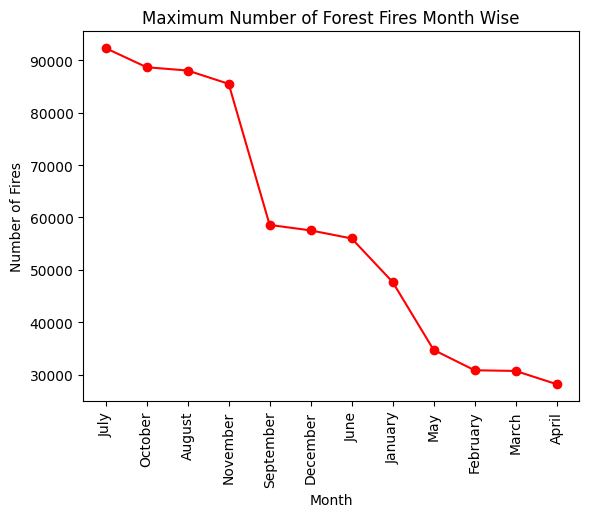

In [79]:
plt.title("Maximum Number of Forest Fires Month Wise")
plt.plot(f_m, marker="o", color="r")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()

In [80]:
# 11. In Which Year Maximum Number of Forest Fires Was Reported?
y_m = df.groupby('year')['number'].sum().sort_values(ascending=False)
y_m

,number
year,
2003,42760.674
2016,42212.229
2015,41208.292
2012,40084.860
2014,39621.183
2009,39116.178
2004,38450.163
2002,37390.600
2010,37037.449


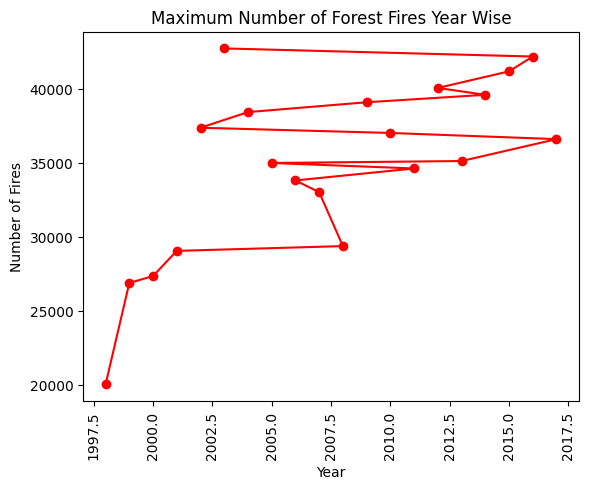

In [81]:
plt.title("Maximum Number of Forest Fires Year Wise")
plt.plot(y_m, marker="o", color="r")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()

In [82]:
# 12. In Which State Maximum Number of Forest Fires Was Reported?
s_f = df.groupby('state')['number'].max().sort_values(ascending=False)
s_f

,number
state,
Amazonas,998.0
Bahia,995.0
Ceara,995.0
Tocantins,989.0
Paraiba,987.0
Pará,982.0
Sao Paulo,981.0
Mato Grosso,979.0
Maranhao,972.0


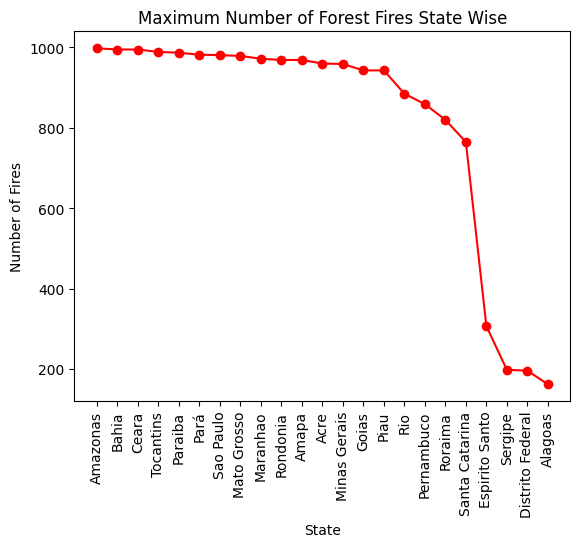

In [83]:
plt.title("Maximum Number of Forest Fires State Wise")
plt.plot(s_f, marker="o", color="r")
plt.xlabel("State")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()

In [84]:
# 13. Find Total Number of Fires Were Reported In Amazonas

a_f = df[df['state'] == 'Amazonas']['number'].sum()
print(f"Total number of fires reported in Amazonas: {a_f}")

Total number of fires reported in Amazonas: 30650.129


In [186]:
# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

data4 = df[df['state']=="Amazonas"]
f_a_y = data4.groupby('year')['number'].sum()
f_a_y

,number
year,
1998,946.000
1999,1061.000
2000,853.000
2001,1297.000
2002,2852.000
2003,1524.268
2004,2298.207
2005,1657.128
2006,997.640


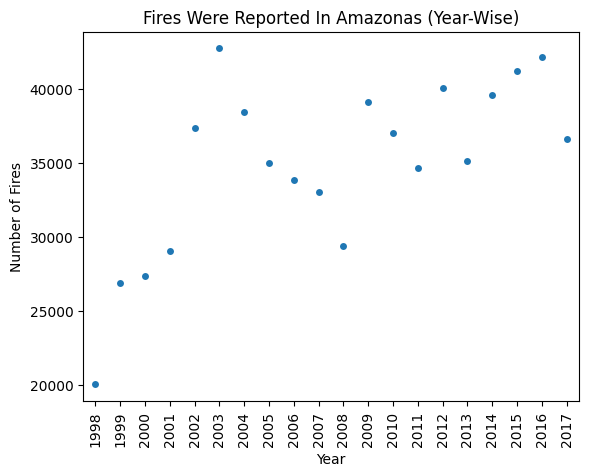

In [86]:
x = f_a_y.index       # years
y = f_a_y.values      # sum of fires per year

plt.title("Fires Were Reported In Amazonas (Year-Wise)")
sns.stripplot(x=x, y=y, marker="o")
# plt.scatter(x, y, marker="o", color="r")
# plt.plot(x, y, marker="o", color="r")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()


In [169]:
# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day_name()

a_d_fn = df[df['state'] == 'Amazonas'].groupby('day')['number'].sum()
# a_d_fn = df.groupby('day')['number'].sum()

a_d_fn

,number
day,
Friday,5446.480
Monday,1886.601
Saturday,4162.666
Sunday,3015.186
Thursday,5754.802
Tuesday,6474.217
Wednesday,3910.177


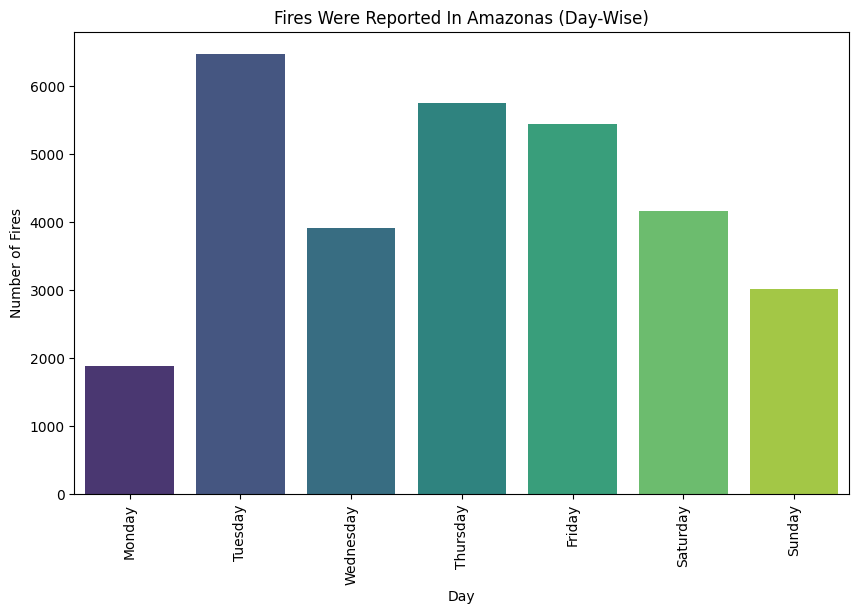

In [184]:
plt.figure(figsize=(10, 6))
plt.title("Fires Were Reported In Amazonas (Day-Wise)")

week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reorder the Series according to week_order
a_d_fn = a_d_fn.reindex(week_order)
a_d_fn.columns = ['day', 'number']

# Plot
sns.barplot(x=a_d_fn.index, y=a_d_fn.values, palette="viridis")

plt.xlabel("Day")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()

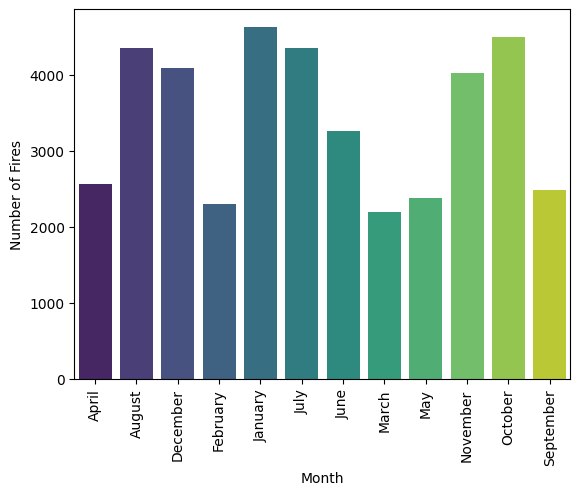

In [137]:
# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
df['Year'] = df['date'].dt.year

yr = df[df['Year'] == 2015]
x = yr.groupby('English_Month')['number'].sum()

sns.barplot(x=x.index, y=x.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.xticks(rotation=90)
plt.show()

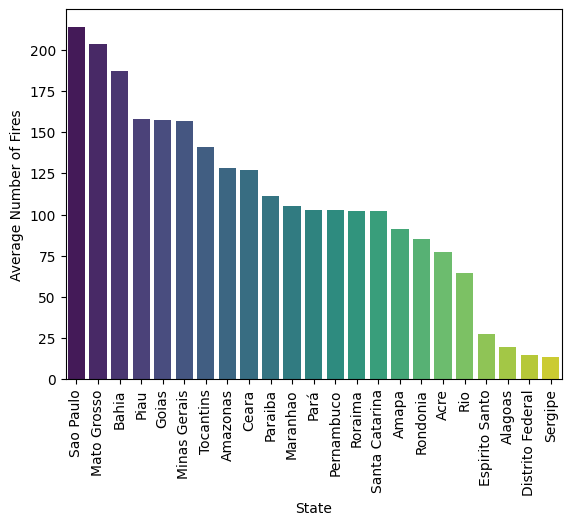

In [142]:
# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

avg = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
avg

# sns.scatterplot(x=avg.index, y=avg.values, palette="viridis")
sns.barplot(x=avg.index, y=avg.values, palette="viridis")
# sns.kdeplot(avg)
plt.xlabel("State")
plt.ylabel("Average Number of Fires")
plt.xticks(rotation=90)
plt.show()

In [168]:
# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

# asa = df[df['English_Month'] == 'December']['state'].unique()
asa = df[df['English_Month'] == 'December']
# len(asa)

sj = asa.groupby('state')

for i,v in sj:
  print(i)
  print(" ")
  print(v)



Acre
 
     year state    month  number       date English_Month        day  Year
220  1998  Acre  January     7.0 1998-01-01      December   Thursday  1998
221  1999  Acre  January     0.0 1999-01-01      December     Friday  1999
222  2000  Acre  January     0.0 2000-01-01      December   Saturday  2000
223  2001  Acre  January     0.0 2001-01-01      December     Monday  2001
224  2002  Acre  January     1.0 2002-01-01      December    Tuesday  2002
225  2003  Acre  January     1.0 2003-01-01      December  Wednesday  2003
226  2004  Acre  January     7.0 2004-01-01      December   Thursday  2004
227  2005  Acre  January     2.0 2005-01-01      December   Saturday  2005
228  2006  Acre  January     0.0 2006-01-01      December     Sunday  2006
229  2007  Acre  January     0.0 2007-01-01      December     Monday  2007
230  2008  Acre  January     0.0 2008-01-01      December    Tuesday  2008
231  2009  Acre  January     1.0 2009-01-01      December   Thursday  2009
232  2010  Acre  J

In [91]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'English_Month'], dtype='object')